In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
file = './data/trajets_train.csv'
df = pd.read_csv(file,sep=",",index_col=[0]) 
traj1 = df[df['traj']==7809] #3500
print(traj1.shape)
traj2 = df[df['traj']==89117] #2500

(3487, 32)


In [17]:
new_traj1 = traj1[['timestamps_UTC', 'RS_E_InAirTemp_PC1']].copy()

# Convert 'timestamps_UTC' to datetime format if it's not already
new_traj1['timestamps_UTC'] = pd.to_datetime(new_traj1['timestamps_UTC'])

# Définissez la date de départ que vous souhaitez, par exemple, "2023-04-15 01:11:00+0000"
start_date = pd.Timestamp("2023-04-15 01:11:00+0000")

# Initialisez une variable pour la date actuelle
current_date = start_date

for index, row in new_traj1.iterrows():
    # Utilisez .loc pour modifier la valeur dans le DataFrame d'origine
    new_traj1.loc[index, 'timestamps_UTC'] = current_date
    current_date += pd.Timedelta(seconds=60)

# Set 'timestamps_UTC' as the index
new_traj1.set_index('timestamps_UTC', inplace=True)


new_traj2 = traj2[['timestamps_UTC', 'RS_E_InAirTemp_PC1']].copy()

# Convert 'timestamps_UTC' to datetime format if it's not already
new_traj2['timestamps_UTC'] = pd.to_datetime(new_traj2['timestamps_UTC'])

# Initialisez une variable pour la date actuelle
current_date = start_date

for index, row in new_traj2.iterrows():
    # Utilisez .loc pour modifier la valeur dans le DataFrame d'origine
    new_traj2.loc[index, 'timestamps_UTC'] = current_date
    current_date += pd.Timedelta(seconds=60)

# Set 'timestamps_UTC' as the index
new_traj2.set_index('timestamps_UTC', inplace=True)

print(new_traj1)


                           RS_E_InAirTemp_PC1
timestamps_UTC                               
2023-04-15 01:11:00+00:00                38.0
2023-04-15 01:12:00+00:00                37.0
2023-04-15 01:13:00+00:00                37.0
2023-04-15 01:14:00+00:00                37.0
2023-04-15 01:15:00+00:00                37.0
...                                       ...
2023-04-17 11:13:00+00:00                41.0
2023-04-17 11:14:00+00:00                47.0
2023-04-17 11:15:00+00:00                52.0
2023-04-17 11:16:00+00:00                55.0
2023-04-17 11:17:00+00:00                57.0

[3487 rows x 1 columns]


In [15]:
print(new_traj1)

                           RS_E_InAirTemp_PC1
timestamps_UTC                               
2023-06-10 09:46:43+00:00                38.0
2023-06-10 09:47:43+00:00                37.0
2023-06-10 09:48:43+00:00                37.0
2023-06-10 09:49:43+00:00                37.0
2023-06-10 09:50:47+00:00                37.0
...                                       ...
2023-04-17 11:13:00+00:00                 NaN
2023-04-17 11:14:00+00:00                 NaN
2023-04-17 11:15:00+00:00                 NaN
2023-04-17 11:16:00+00:00                 NaN
2023-04-17 11:17:00+00:00                 NaN

[6974 rows x 1 columns]


In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a 'timestamps' column and a 'value' column
# Adjust parameters as needed
order = (4, 1, 1)  # Example ARIMA order (p, d, q)

# Train the ARIMA model on new_traj1
model = sm.tsa.ARIMA(new_traj1['RS_E_InAirTemp_PC1'], order=order)
results = model.fit()

# Make predictions on new_traj1
new_traj2['predictions'] = results.predict(start=new_traj2.index.min(), end=new_traj2.index.max(), dynamic=False)

# Compute residuals (difference between actual and predicted values)
new_traj2['residuals'] = new_traj2['RS_E_InAirTemp_PC1'] - new_traj2['predictions']

# Anomaly detection: Define a threshold for anomaly detection based on residuals
threshold = 2.0  # Adjust as needed
new_traj2['anomaly'] = abs(new_traj2['residuals']) > threshold


c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Users\Vincent\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


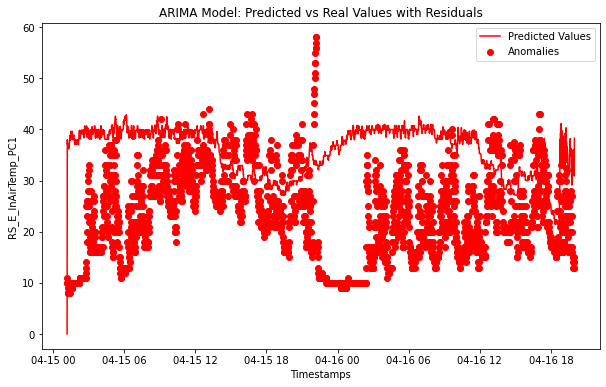

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a 'timestamps' column and a 'value' column
# Adjust parameters as needed
order = (4, 1, 1)  # Example ARIMA order (p, d, q)

# Train the ARIMA model on new_traj1
model = sm.tsa.ARIMA(new_traj1['RS_E_InAirTemp_PC1'], order=order)
results = model.fit()

# Make predictions on new_traj1
new_traj2['predictions'] = results.predict(start=new_traj2.index.min(), end=new_traj2.index.max(), dynamic=False)

# Compute residuals (difference between actual and predicted values)
new_traj2['residuals'] = new_traj2['RS_E_InAirTemp_PC1'] - new_traj2['predictions']

# Anomaly detection: Define a threshold for anomaly detection based on residuals
threshold = 2.0  # Adjust as needed
new_traj2['anomaly'] = abs(new_traj2['residuals']) > threshold




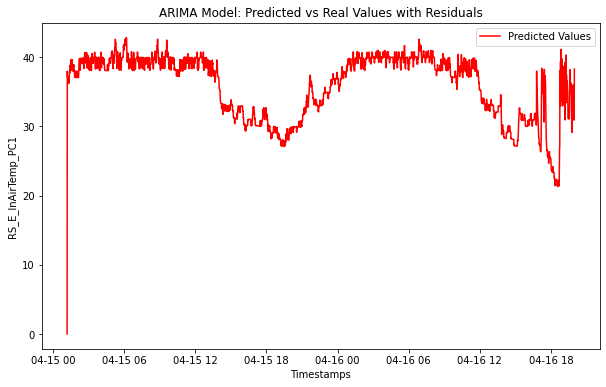

In [22]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting the real values
# plt.plot(new_traj2.index, new_traj2['RS_E_InAirTemp_PC1'], label='Real Values', color='blue')

# Plotting the predicted values
plt.plot(new_traj2.index, new_traj2['predictions'], label='Predicted Values', color='red')

# Plotting the residuals (errors)
# plt.plot(new_traj2.index, new_traj2['residuals'], label='Residuals', color='green')

# Marking anomalies
anomalies = new_traj2[new_traj2['anomaly']]
# plt.scatter(anomalies.index, anomalies['RS_E_InAirTemp_PC1'], color='red', label='Anomalies')

# Adding labels and legend
plt.xlabel('Timestamps')
plt.ylabel('RS_E_InAirTemp_PC1')
plt.title('ARIMA Model: Predicted vs Real Values with Residuals')
plt.legend()
plt.show()

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting the real values
# plt.plot(new_traj2.index, new_traj2['RS_E_InAirTemp_PC1'], label='Real Values', color='blue')

# Plotting the predicted values
plt.plot(new_traj2.index, new_traj2['predictions'], label='Predicted Values', color='red')

# Plotting the residuals (errors)
# plt.plot(new_traj2.index, new_traj2['residuals'], label='Residuals', color='green')

# Marking anomalies
anomalies = new_traj2[new_traj2['anomaly']]
# plt.scatter(anomalies.index, anomalies['RS_E_InAirTemp_PC1'], color='red', label='Anomalies')

# Adding labels and legend
plt.xlabel('Timestamps')
plt.ylabel('RS_E_InAirTemp_PC1')
plt.title('ARIMA Model: Predicted vs Real Values with Residuals')
plt.legend()
plt.show()

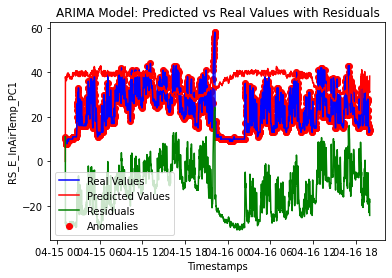

In [19]:
import matplotlib.pyplot as plt

# Plotting the real values
plt.plot(new_traj2.index, new_traj2['RS_E_InAirTemp_PC1'], label='Real Values', color='blue')

# Plotting the predicted values
plt.plot(new_traj2.index, new_traj2['predictions'], label='Predicted Values', color='red')

# Plotting the residuals (errors)
plt.plot(new_traj2.index, new_traj2['residuals'], label='Residuals', color='green')

# Marking anomalies
anomalies = new_traj2[new_traj2['anomaly']]
plt.scatter(anomalies.index, anomalies['RS_E_InAirTemp_PC1'], color='red', label='Anomalies')

# Adding labels and legend
plt.xlabel('Timestamps')
plt.ylabel('RS_E_InAirTemp_PC1')
plt.title('ARIMA Model: Predicted vs Real Values with Residuals')
plt.legend()
plt.show()


In [ ]:
print(traj2[traj2.index.duplicated(keep=False)])


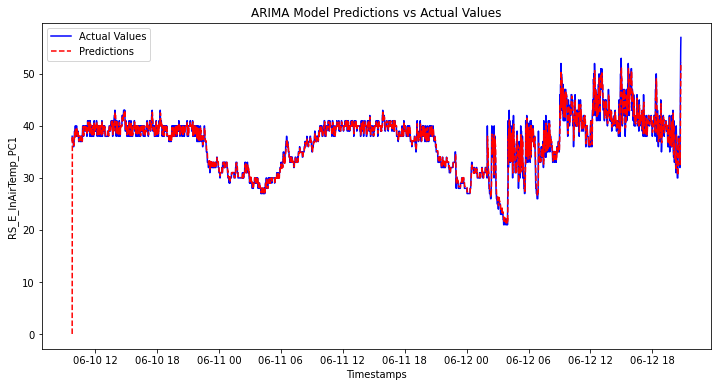

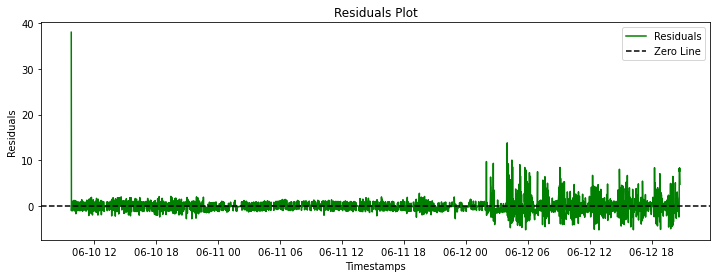

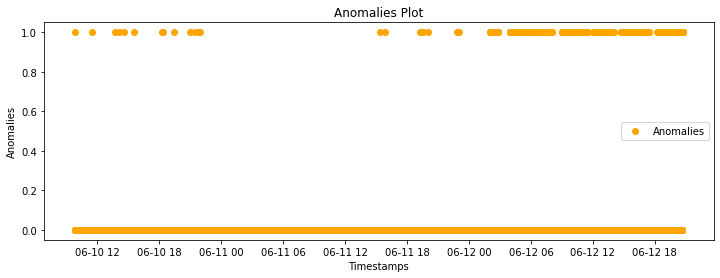

In [9]:
import matplotlib.pyplot as plt

# Plotting the real values and predictions
plt.figure(figsize=(12, 6))
plt.plot(new_traj1.index, new_traj1['RS_E_InAirTemp_PC1'], label='Actual Values', color='blue')
plt.plot(new_traj1.index, new_traj1['predictions'], label='Predictions', color='red', linestyle='--')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Timestamps')
plt.ylabel('RS_E_InAirTemp_PC1')
plt.legend()
plt.show()

# Plotting the residuals
plt.figure(figsize=(12, 4))
plt.plot(new_traj1.index, new_traj1['residuals'], label='Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.title('Residuals Plot')
plt.xlabel('Timestamps')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plotting the anomalies
plt.figure(figsize=(12, 4))
plt.plot(new_traj1.index, new_traj1['anomaly'], label='Anomalies', color='orange', marker='o', linestyle='None')
plt.title('Anomalies Plot')
plt.xlabel('Timestamps')
plt.ylabel('Anomalies')
plt.legend()
plt.show()
